#  8. Morfologické operácie

In [66]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [67]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

Vytvoríme si štruktúrny element (SE) a jednoduchý objekt "L", na ktorom budeme postupne aplikovať morfologické operácie.


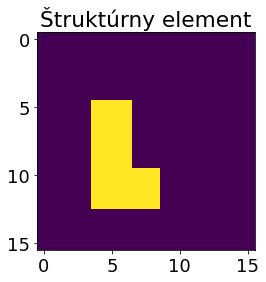

In [68]:

I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)
plt.title("Štruktúrny element");

In [69]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0], SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False, False), (False, False)))

Aplikujeme vlastný algoritmus pre dilatáciu a eróziu. A porovnáme s funkciami z knižnice skimage.morphology.

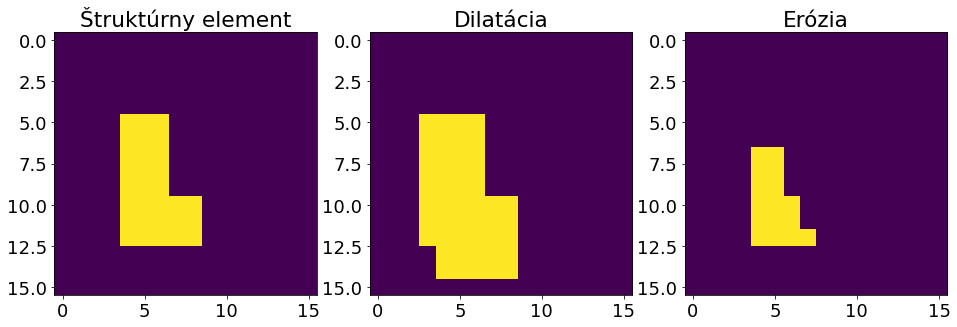

In [70]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]

        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.title("Štruktúrny element")
plt.subplot(132)
plt.imshow(dilated_I)
plt.title("Dilatácia")
plt.subplot(133)
plt.imshow(eroded_I)
plt.title("Erózia");

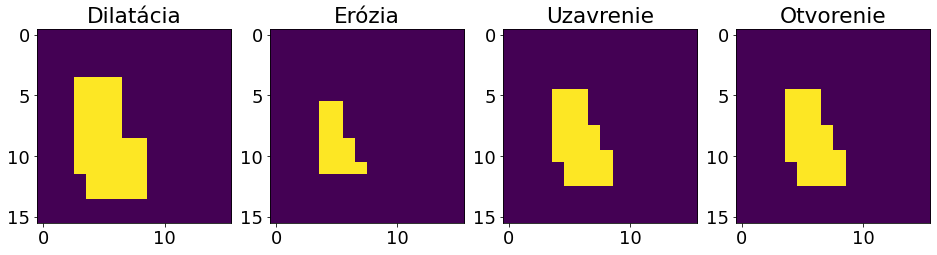

In [71]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.title("Dilatácia");
plt.subplot(142)
plt.imshow(eroded_I)
plt.title("Erózia");
plt.subplot(143)
plt.imshow(closed_I)
plt.title("Uzavrenie");
plt.subplot(144)
plt.imshow(open_I)
plt.title("Otvorenie");

## Real world problem

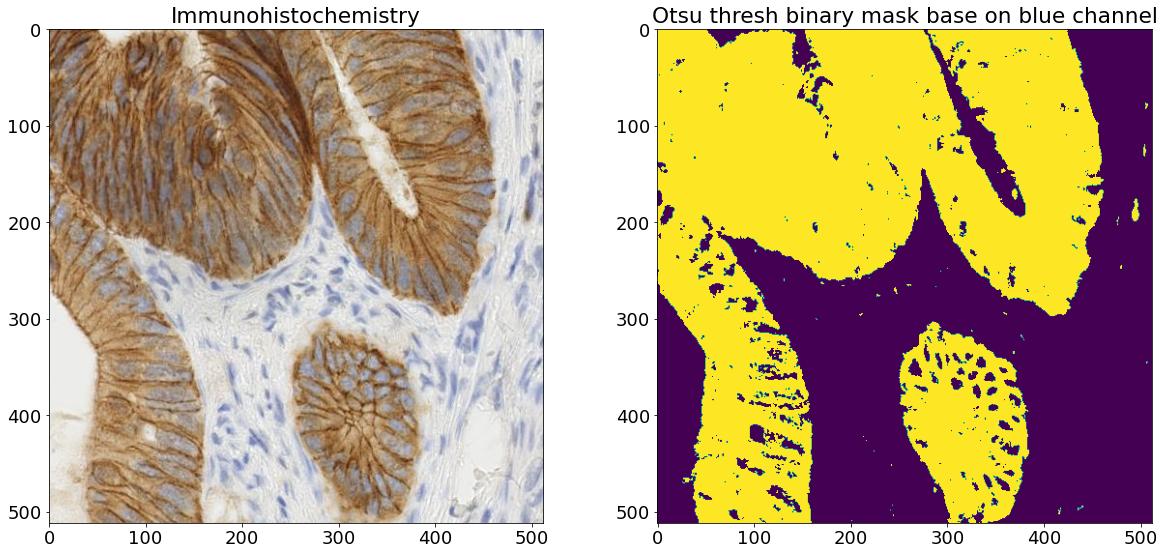

In [72]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(I3)
plt.title('Immunohistochemistry')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel');

Sledujeme ako zmena SE ovptylňuje výsledný obrazok bunky aplikovaním dilatácie a erózie.

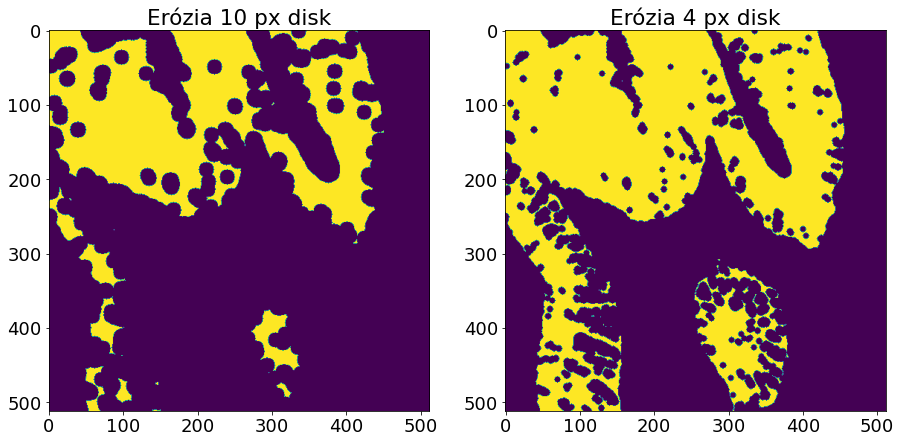

In [73]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erózia 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erózia 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(4)));

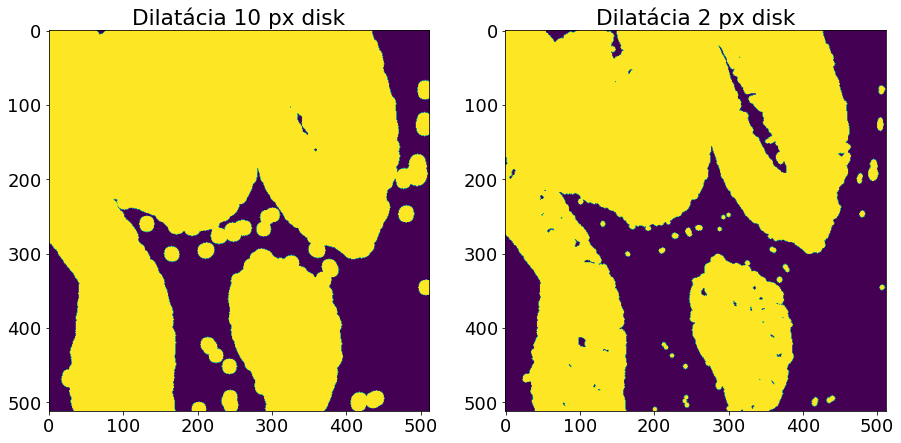

In [74]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilatácia 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilatácia 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)));

Uzavretím nazývame operáciu dilatácie nasledovanú eróziou.

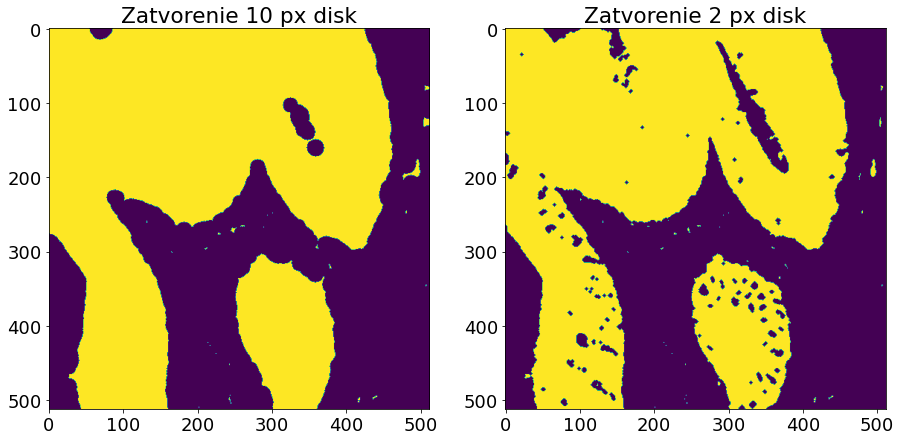

In [75]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Zatvorenie 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Zatvorenie 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)));


Otvorením nazývame operáciu erózie nasledovanej dilatáciou.

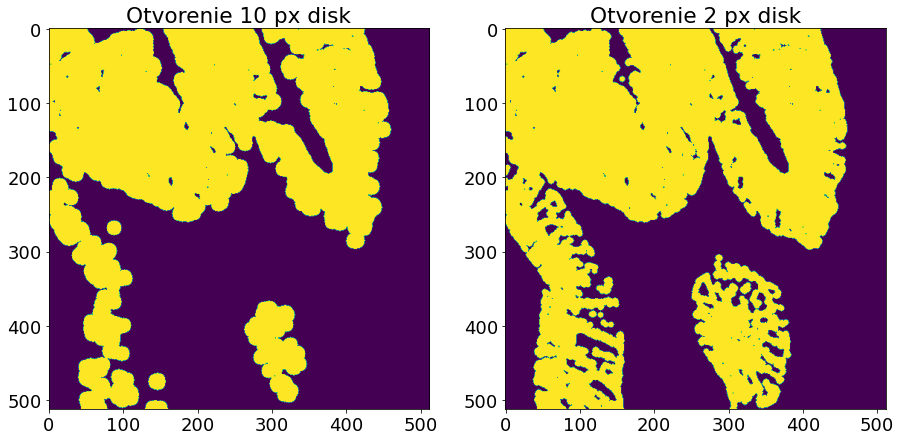

In [76]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Otvorenie 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Otvorenie 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)));

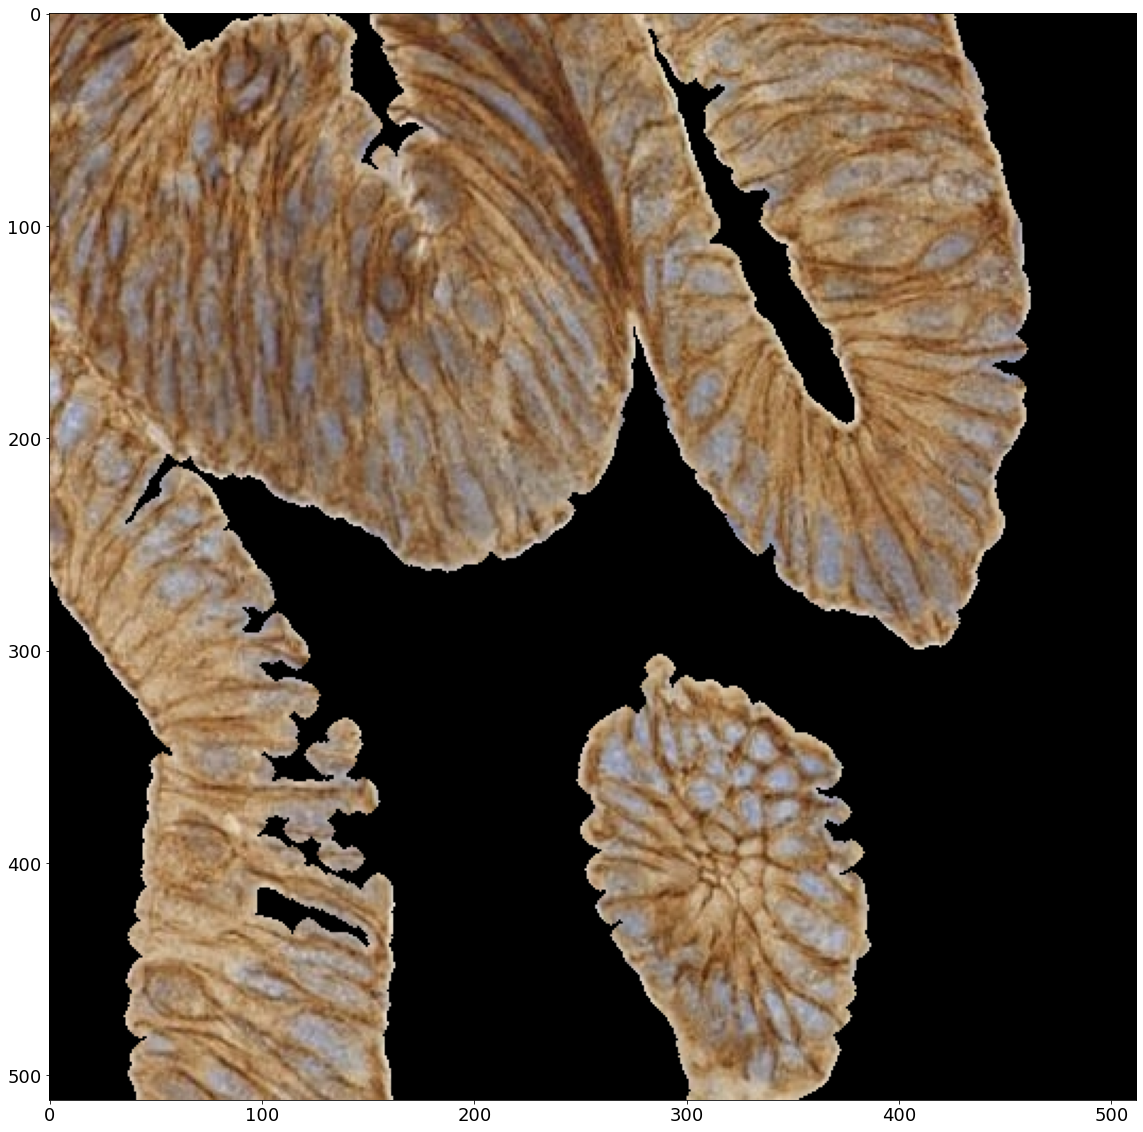

In [77]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')
plt.title('Výsledok');

Opakovanou aplikáciou erózie vznikne skeleton.

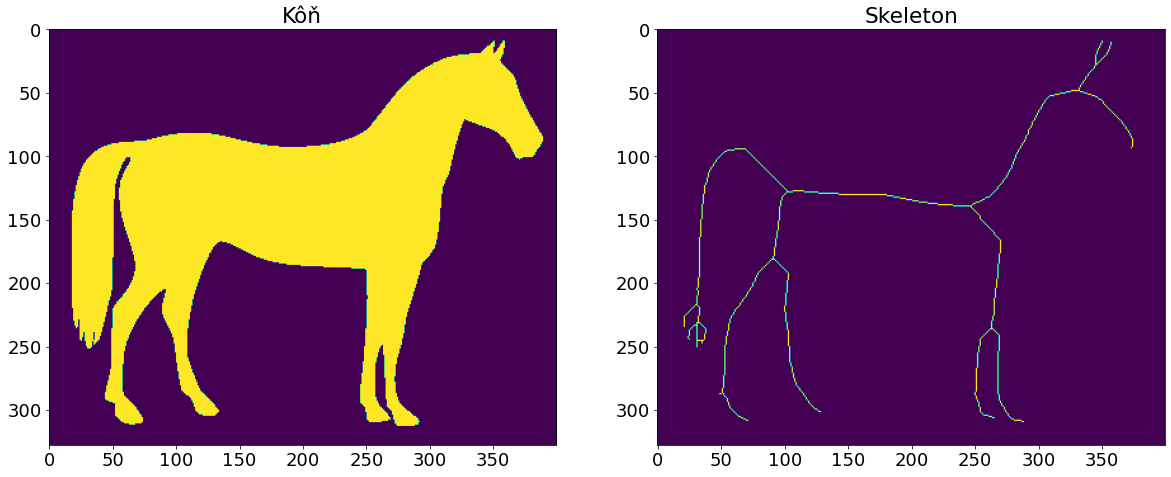

In [80]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.title("Kôň")
plt.imshow(I)
plt.subplot(122)
plt.title("Skeleton")
plt.imshow(morphology.skeletonize(I));

Použitím morfologických operácii oddelíme pozadie obrázka. A uľahčime si tak segmentáciu prahovaním.

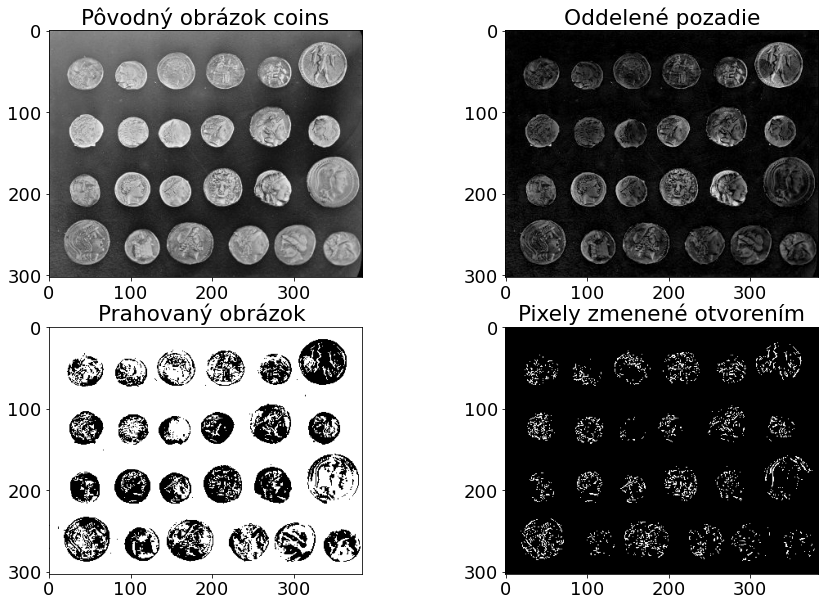

In [79]:
plt.figure(figsize= (15, 10))
plt.subplot(221)
plt.title("Pôvodný obrázok coins")
coins=data.coins()
plt.imshow(coins, cmap='gray')
plt.subplot(222)
plt.title("Oddelené pozadie")
coinsBgr = coins - morphology.opening(coins, morphology.disk(9))
plt.imshow(coinsBgr, cmap = 'gray')
plt.subplot(223)
plt.title("Prahovaný obrázok ")
out  = filters.threshold_otsu(coinsBgr)
coinsThr = coinsBgr<out
plt.imshow(coinsThr, cmap='gray')
plt.subplot(224)
plt.title("Pixely zmenené otvorením")
coinsOp = morphology.opening(coinsThr, morphology.disk(1))
coinsOp = np.logical_xor(coinsOp, coinsThr)
plt.imshow(coinsOp, cmap='gray');